In [1]:
import pandas as pd
from random import sample
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import seaborn as sns
from fastai.tabular.all import *
import geopandas as gpd

In [2]:
df = pd.read_csv("Odin/fused_dataset_plain.csv")
df = df[((df['aankpc'].between(1011, 1109)) & (df['vertpc'].between(1011, 1109))) |
((df['aankpc'].between(1381, 1384)) & (df['vertpc'].between(1381, 1384)))]


/var/folders/99/r_wg55g56p13sfs9r698z04w0000gn/T/ipykernel_35608/3360350131.py:1: DtypeWarning: Columns (54) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Odin/fused_dataset_plain.csv")


In [3]:
df.columns

Index(['trip_id', 'sted_o', 'ovstkaart', 'weekday', 'd_hhchildren',
       'd_high_educ', 'gender', 'age', 'driving_license', 'car_ownership',
       'main_car_user', 'hh_highinc10', 'hh_lowinc10', 'hh_highinc20',
       'hh_lowinc20', 'pur_home', 'pur_work', 'pur_busn', 'pur_other',
       'departure_rain', 'arrival_rain', 'choice', 'dist_car', 'dist_carp',
       'dist_transit', 'dist_cycle', 'dist_walk', 't_car', 't_carp',
       't_transit', 't_cycle', 't_walk', 'c_car', 'c_carp', 'c_transit',
       'c_cycle', 'c_walk', 'vc_car', 'pc_car', 'av_car', 'av_carp',
       'av_transit', 'av_cycle', 'av_walk', 'sted_d', 'actduur', 'aankpc',
       'vertpc', 'pc_car_tue', 'pc_car_npr_mean', 'pc_car_npr_max',
       'pc_car_tue_nan', 'pc_car_npr_mean_nan', 'pc_car_npr_max_nan',
       'creation_datetime'],
      dtype='object')

In [4]:
dep_var = 'choice'
leavout = ['sted_o','sted_d', 'av_car', 'av_carp', 'av_transit', 'av_cycle', 'av_walk', 'c_carp', 'c_cycle', 'c_walk', 'c_car', 'pc_car_tue', 'pc_car_npr_mean', 'pc_car_npr_max', 'aankpc', 'vertpc',
       'pc_car_tue_nan', 'pc_car_npr_mean_nan', 'pc_car_npr_max_nan',
       'creation_datetime']
cat_names = ['ovstkaart','weekday','d_hhchildren', 'd_high_educ', 'gender', 'age', 'pur_home', 'pur_work', 'pur_busn', 'pur_other','driving_license', 'car_ownership',
       'main_car_user', 'hh_highinc10', 'hh_lowinc10', 'hh_highinc20', 'av_car', 'av_carp', 'av_transit', 'av_cycle', 'av_walk']
cont_names = ['c_car','departure_rain', 'arrival_rain','dist_car', 'dist_carp',
       'dist_transit', 'dist_cycle', 'dist_walk', 't_car', 't_carp',
              't_transit', 't_cycle', 't_walk', 'c_transit', 'vc_car', 'pc_car','actduur']

sdf = df[cont_names + cat_names + [dep_var]]

In [5]:
splits = RandomSplitter(valid_pct=0.2)(range_of(sdf))

data = TabularPandas(sdf, procs=[Categorify, FillMissing,Normalize],
                   cat_names= cat_names, cont_names= cont_names,
                   y_names= dep_var,
                   splits=splits, y_block = CategoryBlock)

In [6]:
cleandf = data.xs
cleandf

,ovstkaart,weekday,d_hhchildren,d_high_educ,gender,age,pur_home,pur_work,pur_busn,pur_other,...,dist_walk,t_car,t_carp,t_transit,t_cycle,t_walk,c_transit,vc_car,pc_car,actduur
118195,2,4,2,1,1,2,1,1,1,2,...,0.645767,0.749640,0.802982,0.673364,0.434992,0.604669,0.825696,0.761797,0.0,0.642504
117437,2,4,1,2,1,2,2,1,1,1,...,0.574273,0.645294,0.697440,0.825049,0.422965,0.536212,0.825696,0.761780,0.0,0.636100
52489,1,2,1,2,1,2,2,1,1,1,...,0.154160,-1.283074,-1.253032,-1.163531,-1.796698,0.124352,-1.210876,-1.312612,0.0,-1.504817
82925,1,2,2,1,1,1,1,1,1,2,...,0.012588,-1.283074,-1.253032,-1.163531,-1.796698,0.068393,-1.210876,-1.312612,0.0,0.636100
30520,1,4,2,1,2,2,2,1,1,1,...,0.701688,1.232888,0.864362,0.881172,0.451911,0.655779,0.825862,0.762059,0.0,-1.504817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41997,1,4,1,2,1,2,2,1,1,1,...,0.951384,0.899869,0.926489,0.849487,0.522645,0.867119,0.825892,0.761812,0.0,-1.504817
126008,1,1,1,1,1,2,2,1,1,1,...,-1.827664,-1.283074,0.842654,1.018867,0.898942,-1.852691,0.826211,-1.312612,0.0,0.653178
1300,1,5,1,1,1,3,1,1,1,2,...,-1.827664,0.899869,0.826000,0.961059,1.075063,-1.852691,0.826018,0.761918,0.0,0.648908
94322,1,4,1,2,2,3,2,1,1,1,...,0.672488,0.700427,0.753205,-1.163531,0.302696,0.608587,-1.210876,0.761785,0.0,0.654245


In [7]:
pca = PCA(n_components=2)
reduced = pca.fit_transform(cleandf)
cleandf['PCA1'] = reduced[:, 0]
cleandf['PCA2'] = reduced[:, 1]

In [8]:
corr = cleandf.corr()
high = corr[['PCA1', 'PCA2']]
high[(abs(high.PCA1) > 0.25) | (abs(high.PCA2) > 0.25)]

,PCA1,PCA2
weekday,1.044443e-01,-9.936252e-01
av_car,6.010945e-01,2.727067e-02
av_carp,8.811795e-01,4.116094e-02
av_transit,8.662606e-01,5.091613e-02
av_cycle,5.531727e-01,-1.837177e-02
av_walk,-4.747550e-01,1.652801e-03
dist_car,8.580306e-01,4.236051e-02
dist_carp,8.093201e-01,6.914031e-02
dist_transit,8.422515e-01,6.193647e-02
dist_cycle,7.582878e-01,1.156048e-02


In [9]:
cleandf['choice'] = data.ys
cleandf['aankpc'] = df['aankpc']
cleandf['vertpc'] = df['vertpc']

<Axes: xlabel='PCA1', ylabel='PCA2'>

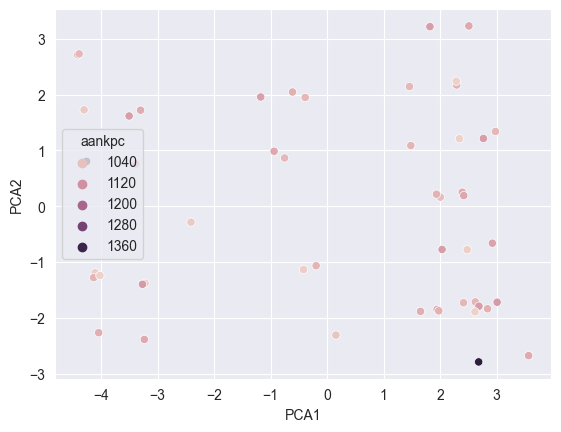

In [10]:
sns.scatterplot(data = cleandf.sample(50), x = 'PCA1', y= 'PCA2', hue = 'aankpc')

<Axes: xlabel='PCA1', ylabel='PCA2'>

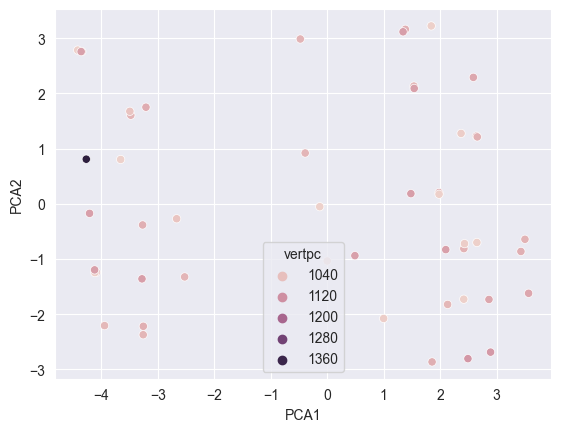

In [42]:
sns.scatterplot(data = cleandf.sample(50), x = 'PCA1', y= 'PCA2', hue = 'vertpc')

<Axes: xlabel='PCA1', ylabel='PCA2'>

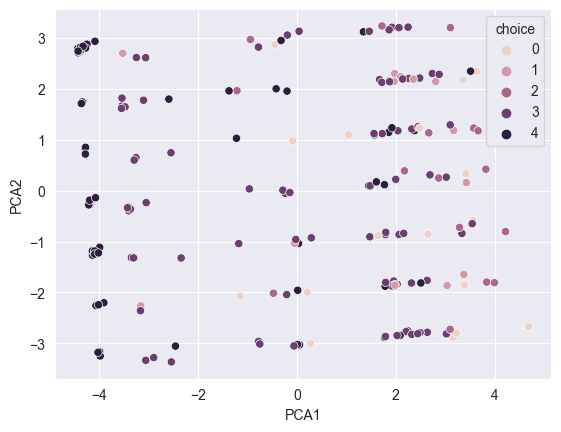

In [43]:
sns.scatterplot(data = cleandf.sample(200), x = 'PCA1', y= 'PCA2', hue = 'choice')

In [11]:
PCs = gpd.read_file('PublicGeoJsons/AmsPCs.json')[['Postcode4', 'geometry']]

In [45]:
cleandf.vertpc.unique()

array([1091, 1011, 1076, 1103, 1104, 1071, 1017, 1068, 1054, 1019, 1055,
       1031, 1072, 1056, 1013, 1093, 1101, 1098, 1052, 1097, 1057, 1065,
       1012, 1074, 1096, 1078, 1087, 1033, 1059, 1066, 1077, 1067, 1043,
       1051, 1035, 1064, 1014, 1015, 1069, 1018, 1081, 1075, 1095, 1079,
       1383, 1021, 1094, 1083, 1016, 1032, 1073, 1092, 1061, 1053, 1105,
       1025, 1102, 1082, 1086, 1062, 1047, 1063, 1106, 1381, 1060, 1034,
       1024, 1058, 1382, 1022, 1107, 1108, 1028, 1023, 1027, 1044, 1036,
       1384, 1109, 1046, 1041])

In [46]:
PCs.Postcode4.unique()

array([1037, 1041, 1073, 1074, 1072, 1017, 1019, 1012, 1016, 1051, 1056,
       1093, 1094, 1098, 1097, 1092, 1091, 1079, 1075, 1054, 1058, 1062,
       1066, 1069, 1068, 1065, 1064, 1061, 1063, 1067, 1011, 1078, 1096,
       1015, 1053, 1052, 1055, 1057, 1021, 1024, 1018, 1107, 1106, 1104,
       1103, 1109, 1031, 1081, 1059, 1060, 1071, 1077, 1076, 1043, 1046,
       1045, 1047, 1032, 1023, 1025, 1028, 1026, 1027, 1035, 1034, 1095,
       1033, 1042, 1044, 1013, 1014, 1036, 1022, 1082, 1083, 1086, 1087,
       1102, 1101, 1105, 1108, 1384, 1383, 1382, 1381])

In [65]:
merged = cleandf.merge(PCs, left_on = 'vertpc', right_on = 'Postcode4')
geoams = gpd.GeoDataFrame(
    merged,
    geometry= merged.geometry,
    crs='EPSG:4326'
)


In [12]:
def plotjourneys(df, choice = (0, 1,2,3, 4)):
    choice0 = df[df['choice'].isin(choice)]
    a_grouped = choice0.groupby('aankpc').count()
    v_grouped = choice0.groupby('vertpc').count()

    CI = v_grouped.index.intersection(a_grouped.index)
    # grouped_merged = v_grouped.merge(PCs, left_on= 'aankpc', right_on='Postcode4')
    grouped_merged = v_grouped.loc[CI].join(PCs.set_index('Postcode4'))
    odin_journeys = gpd.GeoDataFrame(
    grouped_merged,  geometry= grouped_merged.geometry,
    crs='EPSG:4326'
)
    #Vertrek - Aan, positive = more likely to start there
    odin_journeys['diff'] = list(v_grouped.loc[CI]['weekday'] - a_grouped.loc[CI]['weekday'])

    return odin_journeys


In [24]:
vmax = oj['diff'].max()
vmin = oj['diff'].min()

In [26]:
vmax = 11
vmin = -8

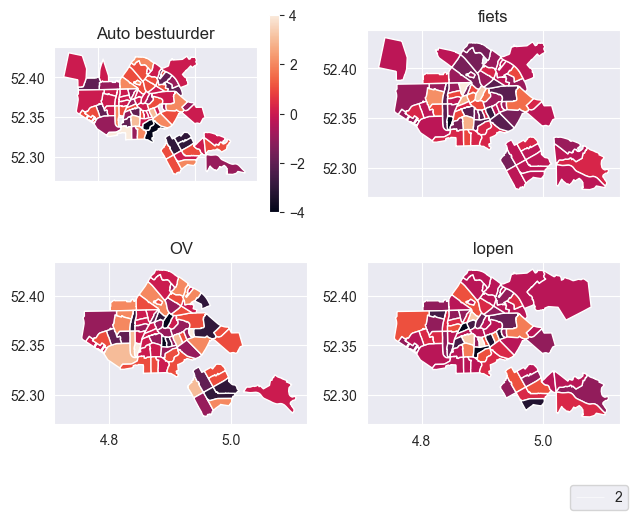

In [30]:
fig, axs = plt.subplots(2, 2, sharex = True)
plotjourneys(cleandf, [0]).plot(ax = axs[0,0], column = 'diff', legend = True)#, vmin=vmin, vmax=vmax)
plotjourneys(cleandf, [2]).plot(ax = axs[1,0], column = 'diff')#, vmin=vmin, vmax=vmax)
plotjourneys(cleandf, [3]).plot(ax = axs[0,1], column = 'diff')#, vmin=vmin, vmax=vmax)
plotjourneys(cleandf, [4]).plot(ax = axs[1,1], column = 'diff')#, vmin=vmin, vmax=vmax)

axs[0, 0].set_title("Auto bestuurder")
axs[1, 0].set_title("OV")

axs[0, 1].set_title("fiets")
axs[1, 1].set_title("lopen")
fig.tight_layout()
labels = cleandf['choice'].unique()
fig.legend(labels, loc='lower right', bbox_to_anchor=(1,-0.1), ncol=len(labels), bbox_transform=fig.transFigure)
# axs.clear()


#positive = more likely to start there

Text(0.5, 1.0, 'fiets')

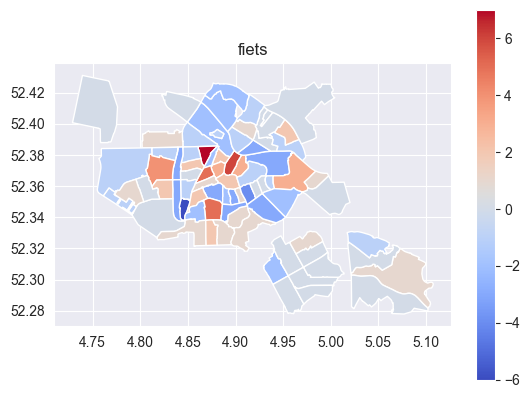

In [35]:
plotjourneys(cleandf, [3]).plot( column = 'diff', legend = True, cmap = 'coolwarm')#, vmin=vmin, vmax=vmax)
plt.title('fiets')

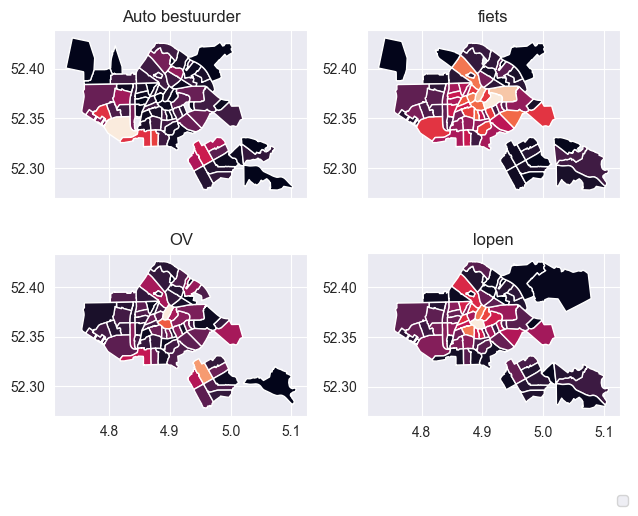

In [14]:
col ='PCA1'
cleandf

fig, axs = plt.subplots(2, 2, sharex = True)
plotjourneys(cleandf, [0]).plot(ax = axs[0,0], column = col, vmin=-4, vmax=4)
plotjourneys(cleandf, [2]).plot(ax = axs[1,0], column = col)
plotjourneys(cleandf, [3]).plot(ax = axs[0,1], column = col)
plotjourneys(cleandf, [4]).plot(ax = axs[1,1], column = col)

axs[0, 0].set_title("Auto bestuurder")
axs[1, 0].set_title("OV")

axs[0, 1].set_title("fiets")
axs[1, 1].set_title("lopen")
fig.tight_layout()
labels = cleandf['choice'].unique()
fig.legend(labels, loc='lower right', bbox_to_anchor=(1,-0.1), ncol=len(labels), bbox_transform=fig.transFigure)
# axs.clear()

In [15]:
oj = plotjourneys(cleandf, [0,1,2,3,4])
oj

,ovstkaart,weekday,d_hhchildren,d_high_educ,gender,age,pur_home,pur_work,pur_busn,pur_other,...,c_transit,vc_car,pc_car,actduur,PCA1,PCA2,choice,aankpc,geometry,diff
1011,97,97,97,97,97,97,97,97,97,97,...,97,97,97,97,97,97,97,97,"POLYGON ((4.89527 52.36736, 4.89608 52.36737, 4.89725 52.36742, 4.89879 52.36726, 4.89928 52.36716, 4.90075 52.36662, 4.90122 52.36577, 4.90563 52.36660, 4.90604 52.36672, 4.90655 52.36698, 4.90710 52.36733, 4.91004 52.36931, 4.91113 52.36996, 4.91341 52.37146, 4.91352 52.37182, 4.91359 52.37226, 4.91361 52.37259, 4.91359 52.37302, 4.91351 52.37343, 4.91339 52.37383, 4.91326 52.37416, 4.91306 52.37453, 4.91272 52.37506, 4.91138 52.37493, 4.91084 52.37708, 4.91075 52.37768, 4.91116 52.37763, 4.91059 52.37991, 4.90868 52.37985, 4.90762 52.37988, 4.90641 52.38003, 4.90429 52.37793, 4.90354 52...",1
1012,144,144,144,144,144,144,144,144,144,144,...,144,144,144,144,144,144,144,144,"POLYGON ((4.88930 52.37445, 4.88891 52.37343, 4.88882 52.37314, 4.88851 52.37232, 4.88783 52.36880, 4.88785 52.36872, 4.88806 52.36849, 4.88964 52.36728, 4.89010 52.36713, 4.89116 52.36696, 4.89174 52.36691, 4.89275 52.36689, 4.89315 52.36690, 4.89336 52.36696, 4.89381 52.36726, 4.89388 52.36728, 4.89432 52.36728, 4.89483 52.36730, 4.89527 52.36736, 4.89550 52.36751, 4.89579 52.36780, 4.89623 52.36828, 4.89637 52.36849, 4.89875 52.37099, 4.89929 52.37157, 4.89986 52.37222, 4.90053 52.37264, 4.90127 52.37417, 4.90227 52.37613, 4.90325 52.37658, 4.90354 52.37716, 4.90429 52.37793, 4.90641 52...",1
1013,109,109,109,109,109,109,109,109,109,109,...,109,109,109,109,109,109,109,109,"MULTIPOLYGON (((4.84935 52.40110, 4.85036 52.40064, 4.85150 52.39999, 4.85255 52.39943, 4.86149 52.39544, 4.86203 52.39516, 4.86280 52.39471, 4.86326 52.39438, 4.86493 52.39301, 4.86554 52.39314, 4.86562 52.39298, 4.86632 52.39311, 4.86789 52.39242, 4.87085 52.39106, 4.87123 52.39091, 4.87141 52.39095, 4.87779 52.38812, 4.87877 52.38770, 4.88103 52.38690, 4.88049 52.38574, 4.88090 52.38573, 4.88124 52.38570, 4.88175 52.38563, 4.88259 52.38545, 4.88235 52.38518, 4.88167 52.38417, 4.88261 52.38389, 4.88294 52.38369, 4.88307 52.38351, 4.88985 52.37972, 4.89024 52.37959, 4.89172 52.37926, 4.89...",4
1014,22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,"MULTIPOLYGON (((4.84432 52.39530, 4.84417 52.39460, 4.84413 52.39413, 4.84412 52.39370, 4.84437 52.38889, 4.84466 52.38889, 4.84466 52.38891, 4.84469 52.38891, 4.84469 52.38875, 4.84466 52.38875, 4.84467 52.38848, 4.84476 52.38691, 4.84473 52.38638, 4.84481 52.38510, 4.84560 52.38516, 4.84718 52.38515, 4.85297 52.38525, 4.85511 52.38530, 4.85566 52.38530, 4.86067 52.38539, 4.87500 52.38564, 4.87988 52.38571, 4.88049 52.38574, 4.88103 52.38690, 4.87877 52.38770, 4.87779 52.38812, 4.87141 52.39095, 4.87123 52.39091, 4.87085 52.39106, 4.86789 52.39242, 4.86632 52.39311, 4.86562 52.39298, 4.86...",1
1015,88,88,88,88,88,88,88,88,88,88,...,88,88,88,88,88,88,88,88,"POLYGON ((4.87551 52.37407, 4.87677 52.37394, 4.87693 52.37395, 4.87693 52.37390, 4.87687 52.37380, 4.88318 52.37523, 4.88357 52.37517, 4.88429 52.37595, 4.88785 52.37472, 4.88801 52.37483, 4.88930 52.37445, 4.88967 52.37481, 4.89208 52.37702, 4.89400 52.37876, 4.89368 52.37889, 4.89353 52.37894, 4.89201 52.37926, 4.89172 52.37926, 4.89024 52.37959, 4.88985 52.37972, 4.88307 52.38351, 4.88294 52.38369, 4.88261 52.38389, 4.88167 52.38417, 4.88076 52.38270, 4.88065 52.38256, 4.88049 52.38240, 4.88033 52.38230, 4.88010 52.38218, 4.87981 52.38206, 4.87970 52.38199, 4.87960 52.38186, 4.87957 52...",4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1109,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,"POLYGON ((4.99808 52.31403, 4.99720 52.31349, 4.99906 52.31243, 4.99996 52.31194, 5.00163 52.31093, 5.00210 52.31071, 5.00272 52.31048, 5.00324 52.31034, 5.00365 52.31026, 5.00407 52.31019, 5.00449 52.31015, 5.00640 52.31001, 5.00699 52.30992, 5.00754 52.30977, 5.00794 52.30963, 5.00818 52.30953, 5.00863 52.30928, 5.00971 52.30